# Introduction

The data set refers to clients of a wholesale distributor. It includes the annual spending on different product categories.

Attribute Information:

1) FRESH: annual spending on fresh products.

2) MILK: annual spendingon milk products.

3) GROCERY: annual spending on grocery products.

4) FROZEN: annual spending on frozen products.

5) DETERGENTS: annual spending on detergents products.

6) DELICATESSEN: annual spending on and delicatessen products.

7) COSMETIC: annual spending on cosmetic products.

8) CLOTHING: annual spending on clothing products.

9) STATIONARY: annual spending on stationary products.

10) CHANNEL: customers Channel - Hotel or Retail channel.

11) REGION: customers Region - KA,TN,and KL.

12)LOYAL: customer loyalty - yes or no

13)COUNTRY: customer country

14)DISCOUNTS: Discount value

### Importing libraries to understand and manipulate data


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

#plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
#%matplotlib inline

#for clustering
from sklearn.cluster import KMeans

### Importing Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data (6).csv


In [0]:
import io
customer_df = pd.read_csv(io.BytesIO(uploaded['Wholesale customers data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
customer_df.info() # for meta data information
#customer_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 14 columns):
Channel       440 non-null int64
Region        440 non-null int64
Fresh         440 non-null int64
Milk          440 non-null int64
Grocery       440 non-null int64
Frozen        440 non-null int64
Detergents    440 non-null int64
Delicassen    440 non-null int64
Cosmetic      20 non-null float64
Clothing      440 non-null int64
Stationary    434 non-null float64
Loyalty       29 non-null object
Country       440 non-null object
Discounts     440 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 48.2+ KB


In [5]:
customer_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Cosmetic,Clothing,Stationary,Loyalty,Country,Discounts
0,2,3,12669,9656,7561,214,2674,1338,1080.0,206896,6335.0,yes,IN,1000
1,2,3,7057,9810,9568,1762,3293,1776,214.0,296019,3529.0,yes,IN,1000
2,2,3,6353,8808,7684,2405,3516,7844,NaN,156778,3177.0,no,IN,1000
3,1,3,13265,1196,4221,6404,507,1788,NaN,244897,6633.0,NaN,IN,1000
4,2,3,22615,5410,7198,3915,1777,5185,NaN,120420,11308.0,NaN,IN,1000


In [6]:
type(customer_df)

pandas.core.frame.DataFrame

In [0]:
customer_df[['Channel','Region']] = customer_df[['Channel','Region']].astype('object')

In [8]:
#customer_df.get_dtype_counts()
customer_df.dtypes

Channel        object
Region         object
Fresh           int64
Milk            int64
Grocery         int64
Frozen          int64
Detergents      int64
Delicassen      int64
Cosmetic      float64
Clothing        int64
Stationary    float64
Loyalty        object
Country        object
Discounts       int64
dtype: object

## **Exploratory Data Analysis**

In [9]:
print("Descriptive statistics for the data")
customer_df.describe()

Descriptive statistics for the data


,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Cosmetic,Clothing,Stationary,Discounts
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,20.000000,440.000000,434.000000,440.0
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,3163.600000,205149.452273,6006.225806,1000.0
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,3049.617688,57429.109573,6338.352972,0.0
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,214.000000,101344.000000,2.000000,1000.0
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,893.500000,156967.000000,1570.750000,1000.0
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1835.000000,205215.500000,4275.000000,1000.0
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,4749.500000,254216.000000,8453.250000,1000.0
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,9856.000000,299793.000000,56076.000000,1000.0


In [0]:
#median is more reliable central tendency as compare to mean
#(1+2+2+2+3)/5 #18, -10
#np.median([1,2,2,18])
#median=1,2,2,2,x is 2

**Categorical variables**

In [11]:
print(customer_df['Channel'].value_counts())
print(customer_df['Region'].value_counts())
print(customer_df['Loyalty'].value_counts())

1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64
yes    17
no     12
Name: Loyalty, dtype: int64


**Copying the data into another dataframe**

In [0]:
customer_copy=customer_df.copy()

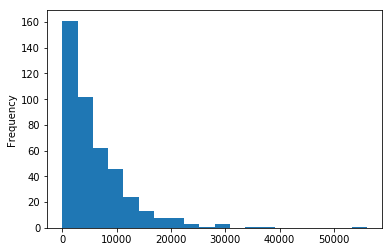

In [13]:
#customer_copy['Cosmetic'].plot.hist(bins = 20)
customer_copy['Stationary'].plot.hist(bins = 20)
plt.show()

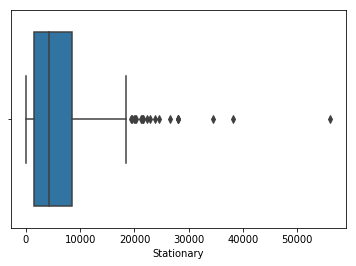

In [14]:
sns.boxplot(customer_copy['Stationary'])

In [0]:
#customer_copy['Channel'] = customer_copy['Channel'].map({1:'Hotel', 2:'Retail'})
customer_copy['Channel'].replace([1,2],['Hotel','Retail'],inplace=True)

In [0]:
customer_copy['Region'].replace([1,2,3],['KA','TN','KL'],inplace=True)

In [17]:
customer_copy.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Cosmetic,Clothing,Stationary,Loyalty,Country,Discounts
0,Retail,KL,12669,9656,7561,214,2674,1338,1080.0,206896,6335.0,yes,IN,1000
1,Retail,KL,7057,9810,9568,1762,3293,1776,214.0,296019,3529.0,yes,IN,1000
2,Retail,KL,6353,8808,7684,2405,3516,7844,NaN,156778,3177.0,no,IN,1000
3,Hotel,KL,13265,1196,4221,6404,507,1788,NaN,244897,6633.0,NaN,IN,1000
4,Retail,KL,22615,5410,7198,3915,1777,5185,NaN,120420,11308.0,NaN,IN,1000


## Missing Values 

In [18]:
customer_df.isnull().sum()

Channel         0
Region          0
Fresh           0
Milk            0
Grocery         0
Frozen          0
Detergents      0
Delicassen      0
Cosmetic      420
Clothing        0
Stationary      6
Loyalty       411
Country         0
Discounts       0
dtype: int64

**Stationary -**

In [19]:
customer_copy['Stationary'].describe()

count      434.000000
mean      6006.225806
std       6338.352972
min          2.000000
25%       1570.750000
50%       4275.000000
75%       8453.250000
max      56076.000000
Name: Stationary, dtype: float64

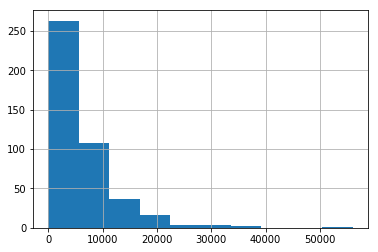

In [20]:
customer_copy['Stationary'].hist()

In [0]:
Stationary_copy=customer_copy['Stationary'].copy() #copying the variable so that we can compare the variables after changes

In [0]:
Stationary_copy.fillna(0,inplace=True)

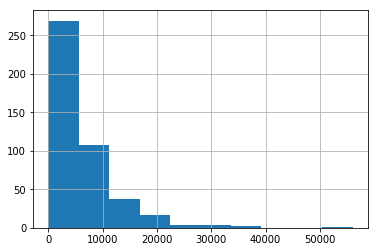

In [23]:
Stationary_copy.hist()

In [24]:
Stationary_copy.describe()

count      440.000000
mean      5924.322727
std       6333.400269
min          0.000000
25%       1529.250000
50%       4152.500000
75%       8377.500000
max      56076.000000
Name: Stationary, dtype: float64

*For trying later-*

In [0]:
Stationary_copy.median()
Stationary_copy.fillna(Stationary_copy.median(),inplace=True)

In [26]:
print(customer_copy['Stationary'].describe())
print(Stationary_copy.describe())

count      434.000000
mean      6006.225806
std       6338.352972
min          2.000000
25%       1570.750000
50%       4275.000000
75%       8453.250000
max      56076.000000
Name: Stationary, dtype: float64
count      440.000000
mean      5924.322727
std       6333.400269
min          0.000000
25%       1529.250000
50%       4152.500000
75%       8377.500000
max      56076.000000
Name: Stationary, dtype: float64


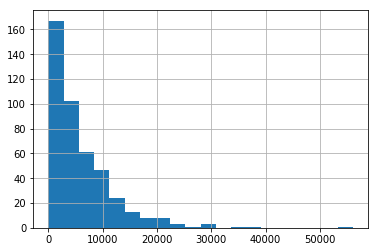

In [27]:
Stationary_copy.hist(bins = 20)
plt.show()

**Cosmetic-**

In [28]:
customer_copy['Cosmetic '].isnull().sum()

420

In [29]:
customer_copy['Cosmetic '].describe()

count      20.000000
mean     3163.600000
std      3049.617688
min       214.000000
25%       893.500000
50%      1835.000000
75%      4749.500000
max      9856.000000
Name: Cosmetic , dtype: float64

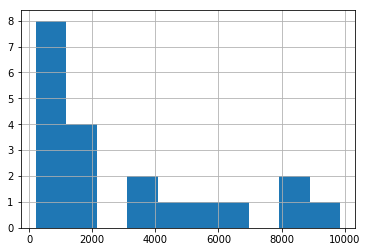

In [30]:
customer_copy['Cosmetic '].hist()

In [0]:
cosmetic_copy=customer_copy['Cosmetic '].copy()
cosmetic_copy.fillna(0,inplace=True)
#customer_copy.columns

In [32]:
cosmetic_copy.isnull().sum()

0

In [33]:
cosmetic_copy.describe()

count     440.000000
mean      143.800000
std       915.286502
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      9856.000000
Name: Cosmetic , dtype: float64

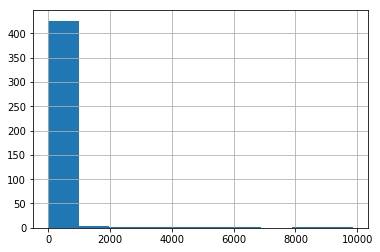

In [34]:
cosmetic_copy.hist()

### Categorical Data

In [35]:
#customer_copy['Loyalty'].value_counts()
customer_copy['Loyalty'].isnull().sum()

411

## Bivariate Analysis

In [36]:
customer_copy.corr()

,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Cosmetic,Clothing,Stationary,Discounts
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,-0.097364,0.051673,1.000000,NaN
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,-0.219257,0.012076,0.098510,NaN
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,-0.064663,0.005947,-0.009955,NaN
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,-0.123869,-0.028703,0.348690,NaN
Detergents,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,-0.065191,-0.008398,-0.099603,NaN
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.045838,-0.062263,0.243429,NaN
Cosmetic,-0.097364,-0.219257,-0.064663,-0.123869,-0.065191,0.045838,1.000000,0.194869,-0.097369,NaN
Clothing,0.051673,0.012076,0.005947,-0.028703,-0.008398,-0.062263,0.194869,1.000000,0.054470,NaN
Stationary,1.000000,0.098510,-0.009955,0.348690,-0.099603,0.243429,-0.097369,0.054470,1.000000,NaN
Discounts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlation Heat map of the data


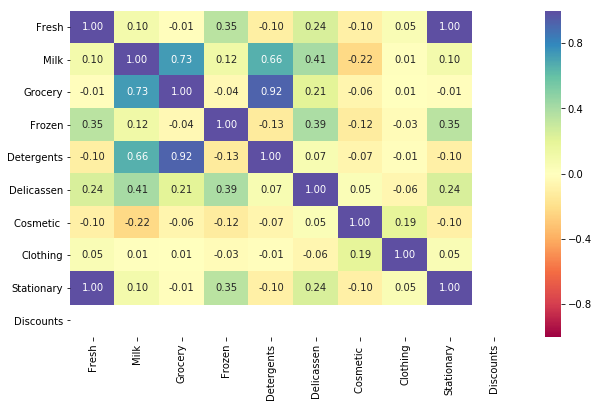

In [37]:
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(customer_copy.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()

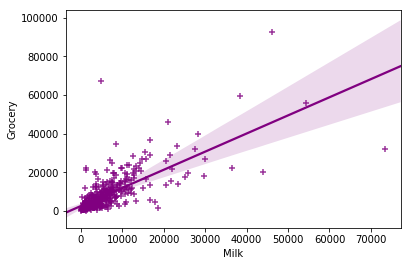

In [38]:
sns.regplot('Milk','Grocery',data=customer_copy,color="purple",marker="+")
#customer_copy.plot.scatter('Milk','Grocery',s=10,c="red")
plt.show()

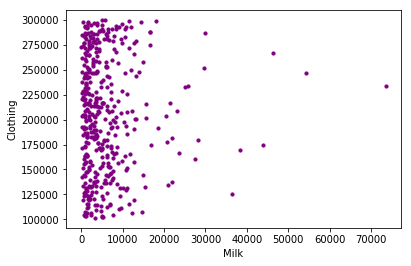

In [39]:
customer_copy.plot.scatter('Milk','Clothing',s=10,c="purple")
plt.show()

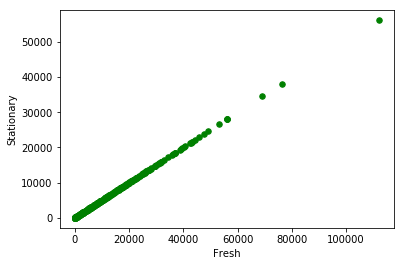

In [40]:
customer_copy.plot.scatter('Fresh','Stationary',s=30,c="green")
plt.show()

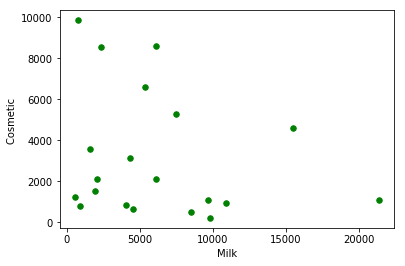

In [41]:
customer_copy.plot.scatter('Milk','Cosmetic ',s=30,c="green")
plt.show()

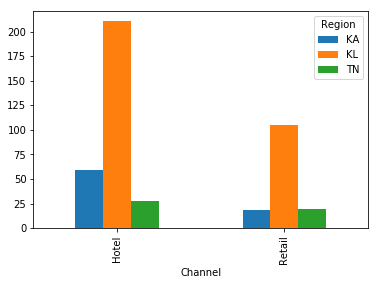

Region   KA   KL  TN
Channel             
Hotel    59  211  28
Retail   18  105  19


In [42]:
def categorical_multi(i,j):
    pd.crosstab(customer_copy[i],customer_copy[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(customer_copy[i],customer_copy[j]))

categorical_multi(i='Channel',j='Region') 

# K Means 




**Preparing data for clustering**

In [0]:
Numeric_data = customer_copy[['Fresh','Milk','Grocery','Frozen','Detergents','Delicassen','Clothing','Stationary']]

In [44]:
Numeric_data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', 'Delicassen',
       'Clothing', 'Stationary'],
      dtype='object')

In [0]:
Numeric_data['Stationary'].fillna(Numeric_data['Stationary'].median(),inplace=True)

Scaling the data

In [46]:
#This estimator scales and transform the data into zero to one range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Numeric_data)
scaled_data = pd.DataFrame(scaled_data,columns=Numeric_data.columns)
scaled_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Clothing,Stationary
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.531885,0.112940
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.980983,0.062899
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.279336,0.056622
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0.723375,0.118254
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.096125,0.201626


Finding Number of clusters

In [0]:

X1 = scaled_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', 'Delicassen','Clothing']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

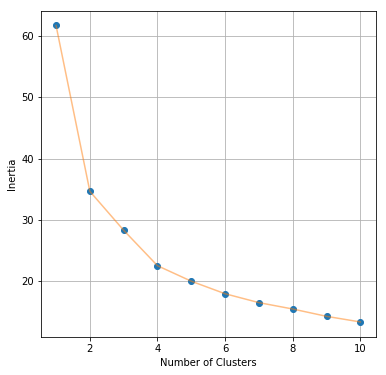

In [48]:
plt.figure(1 , figsize = (6 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.grid()
plt.show()

In [49]:
#from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,random_state=7)
model.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [50]:
clusters_data = customer_df.copy()
clusters_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Cosmetic,Clothing,Stationary,Loyalty,Country,Discounts
0,2,3,12669,9656,7561,214,2674,1338,1080.0,206896,6335.0,yes,IN,1000
1,2,3,7057,9810,9568,1762,3293,1776,214.0,296019,3529.0,yes,IN,1000
2,2,3,6353,8808,7684,2405,3516,7844,NaN,156778,3177.0,no,IN,1000
3,1,3,13265,1196,4221,6404,507,1788,NaN,244897,6633.0,NaN,IN,1000
4,2,3,22615,5410,7198,3915,1777,5185,NaN,120420,11308.0,NaN,IN,1000


In [51]:
clusters_data['clusters']=model.predict(scaled_data)
clusters_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Cosmetic,Clothing,Stationary,Loyalty,Country,Discounts,clusters
0,2,3,12669,9656,7561,214,2674,1338,1080.0,206896,6335.0,yes,IN,1000,2
1,2,3,7057,9810,9568,1762,3293,1776,214.0,296019,3529.0,yes,IN,1000,0
2,2,3,6353,8808,7684,2405,3516,7844,NaN,156778,3177.0,no,IN,1000,1
3,1,3,13265,1196,4221,6404,507,1788,NaN,244897,6633.0,NaN,IN,1000,0
4,2,3,22615,5410,7198,3915,1777,5185,NaN,120420,11308.0,NaN,IN,1000,1


In [52]:
#cluster profiles
clust_prof = clusters_data.groupby(['clusters'],as_index=False).mean()
clust_prof

,clusters,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Cosmetic,Clothing,Stationary,Discounts
0,0,12845.580420,4719.916084,6753.923077,2767.034965,2182.300699,1181.888112,4867.500000,271770.587413,6495.822695,1000.0
1,1,10521.480916,5227.839695,7163.488550,2780.236641,2571.458015,1554.297710,3083.500000,135404.541985,5281.346154,1000.0
2,2,11496.655629,4686.695364,6604.046358,3328.708609,2154.112583,1385.198675,2688.222222,202055.278146,5674.047297,1000.0
3,3,21926.933333,32191.400000,39808.200000,5941.200000,19577.066667,5943.666667,1107.000000,210281.533333,10963.800000,1000.0


Understanding the Output

In [53]:
clusters_data['clusters'].value_counts()

2    151
0    143
1    131
3     15
Name: clusters, dtype: int64

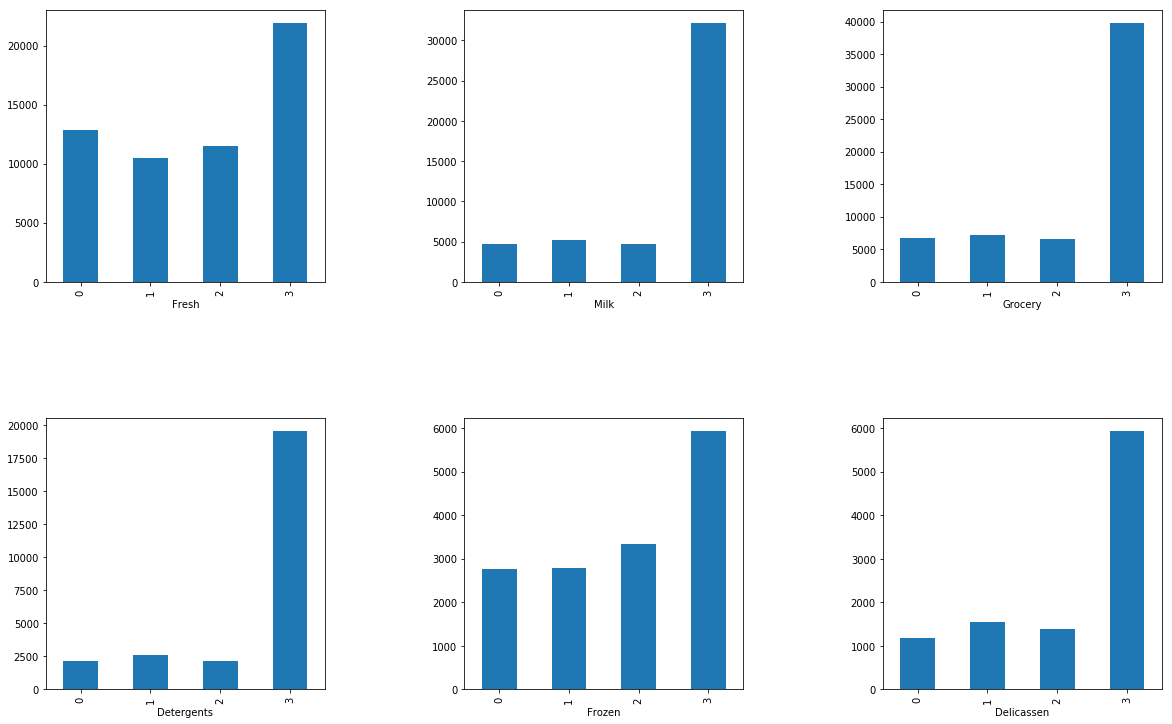

In [54]:
plt.figure(1 , figsize = (20,20))
n = 0 
for x in ['Fresh', 'Milk', 'Grocery','Detergents','Frozen','Delicassen']:
    n += 1
    plt.subplot(3,3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    clusters_data[x].groupby(clusters_data['clusters']).mean().plot(kind='bar')
    plt.xlabel(x)
       
    
plt.show()

Z score tells us how far is a cluster mean value from its population mean. These scores have distribution with mean 0 and std. dev 1.

In [55]:
#Population mean of all the columns
clust_mean=clusters_data[['Fresh', 'Milk', 'Grocery','Detergents','Frozen','Delicassen']].mean(axis=0)
print('\033[1m'+"Population average of variables")
print('\033[0m')
print(clust_mean)

#printing bolds and colors in terminal
#http://jafrog.com/2013/11/23/colors-in-terminal.html 

Population average of variables

Fresh         12000.297727
Milk           5796.265909
Grocery        7951.277273
Detergents     2881.493182
Frozen         3071.931818
Delicassen     1524.870455
dtype: float64


In [56]:
#Population mean of all the columns
clust_std=clusters_data[['Fresh', 'Milk', 'Grocery','Detergents','Frozen','Delicassen']].std(axis=0)
print('\033[1m'+"Population Std. Deviation of variables")
print('\033[0m')
print(clust_std)

Population Std. Deviation of variables

Fresh         12647.328865
Milk           7380.377175
Grocery        9503.162829
Detergents     4767.854448
Frozen         4854.673333
Delicassen     2820.105937
dtype: float64


In [0]:
cluster_deviation=[]
cluster_zscore=[]

for x in ['Fresh', 'Milk', 'Grocery','Detergents','Frozen','Delicassen']:
    devi=clust_prof[x]-clust_mean[x]
    cluster_deviation.append(devi)
    zsc=devi/clust_std[x]
    cluster_zscore.append(zsc)

In [58]:
#print(pd.DataFrame(cluster_deviation))
print(pd.DataFrame(cluster_zscore))

                   0         1         2         3
Fresh       0.066835 -0.116927 -0.039822  0.784880
Milk       -0.145839 -0.077019 -0.150341  3.576394
Grocery    -0.125995 -0.082898 -0.141767  3.352244
Detergents -0.146647 -0.065026 -0.152559  3.501695
Frozen     -0.062805 -0.060085  0.052893  0.591032
Delicassen -0.121620  0.010435 -0.049527  1.566890


In [59]:
cluster_zscore_df=pd.DataFrame(cluster_zscore) #converting it into pandas dataframe
zscore_transpose_df=cluster_zscore_df.T #transposing the dataframe
zscore_transpose_df

,Fresh,Milk,Grocery,Detergents,Frozen,Delicassen
0,0.066835,-0.145839,-0.125995,-0.146647,-0.062805,-0.121620
1,-0.116927,-0.077019,-0.082898,-0.065026,-0.060085,0.010435
2,-0.039822,-0.150341,-0.141767,-0.152559,0.052893,-0.049527
3,0.784880,3.576394,3.352244,3.501695,0.591032,1.566890


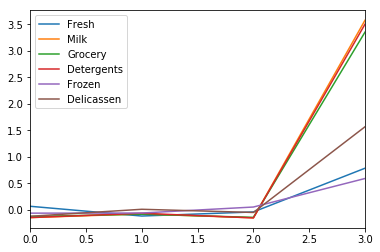

In [60]:
zscore_transpose_df.plot(kind='line')
plt.show()

### Clustering on correlated variables

In [0]:
#Fresh
X1 = np.array(scaled_data['Fresh']).reshape(-1, 1)
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

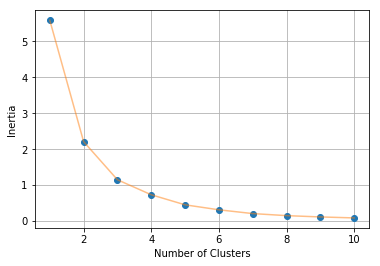

In [62]:
#plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.grid()
plt.show()

In [0]:
#Fresh 
#X1 = np.array(scaled_data[['Fresh','Grocery']])
X2 = np.array(scaled_data[['Fresh','Stationary']])
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

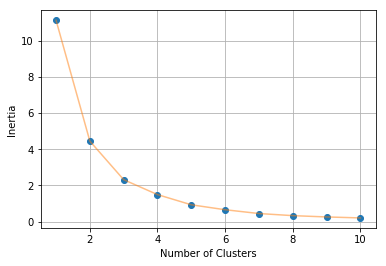

In [64]:
#plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.grid()
plt.show()

In [65]:
model = KMeans(n_clusters=4,random_state=7)
#model.fit(np.array(scaled_data['Fresh']).reshape(-1, 1))
model.fit(scaled_data[['Fresh','Stationary']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [66]:
clusters_data = customer_df.copy()
clusters_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Cosmetic,Clothing,Stationary,Loyalty,Country,Discounts
0,2,3,12669,9656,7561,214,2674,1338,1080.0,206896,6335.0,yes,IN,1000
1,2,3,7057,9810,9568,1762,3293,1776,214.0,296019,3529.0,yes,IN,1000
2,2,3,6353,8808,7684,2405,3516,7844,NaN,156778,3177.0,no,IN,1000
3,1,3,13265,1196,4221,6404,507,1788,NaN,244897,6633.0,NaN,IN,1000
4,2,3,22615,5410,7198,3915,1777,5185,NaN,120420,11308.0,NaN,IN,1000


In [0]:
clusters_data['clusters']=model.predict(scaled_data[['Fresh','Stationary']])

In [68]:
clusters_data['clusters'].value_counts()

0    251
1    133
3     49
2      7
Name: clusters, dtype: int64

## Data Transformation

In [69]:
customer_copy.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Cosmetic,Clothing,Stationary,Loyalty,Country,Discounts
0,Retail,KL,12669,9656,7561,214,2674,1338,1080.0,206896,6335.0,yes,IN,1000
1,Retail,KL,7057,9810,9568,1762,3293,1776,214.0,296019,3529.0,yes,IN,1000
2,Retail,KL,6353,8808,7684,2405,3516,7844,NaN,156778,3177.0,no,IN,1000
3,Hotel,KL,13265,1196,4221,6404,507,1788,NaN,244897,6633.0,NaN,IN,1000
4,Retail,KL,22615,5410,7198,3915,1777,5185,NaN,120420,11308.0,NaN,IN,1000


In [70]:
customer_copy[['Milk','Grocery']].corr()
#customer_copy.plot.scatter('Milk','Grocery',s=10,c="red")
#plt.show()

,Milk,Grocery
Milk,1.000000,0.728335
Grocery,0.728335,1.000000


In [0]:
exp_data=np.sqrt(customer_copy[['Milk','Grocery']])

In [72]:
exp_data.corr()

,Milk,Grocery
Milk,1.000000,0.783826
Grocery,0.783826,1.000000


In [0]:
# Scale the data using the natural logarithm
log_data = np.log(customer_copy[['Fresh','Milk','Grocery','Frozen','Detergents','Delicassen','Clothing']])

In [74]:
log_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Clothing
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,12.239972
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,12.598179
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,11.962586
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,12.408593
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,11.698741


## Treatment of Outliers

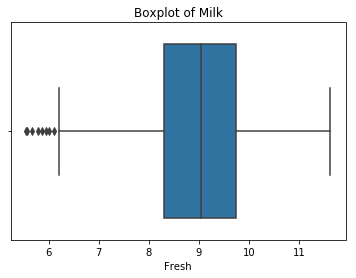

In [88]:
sns.boxplot(log_data['Fresh'])
plt.title("Boxplot of Milk")
plt.show()


In [90]:
log_data['Fresh'].describe()

count    440.000000
mean       8.913086
std        1.130121
min        5.541264
25%        8.297540
50%        9.049991
75%        9.737064
max       11.627601
Name: Fresh, dtype: float64

In [91]:
IQR=np.percentile(log_data['Fresh'],75) - np.percentile(log_data['Fresh'],25)
Outlier_top=np.percentile(log_data['Fresh'],75)+1.5*IQR
Outlier_bottom=np.percentile(log_data['Fresh'],25)-1.5*IQR
print(Outlier_top)
print(Outlier_bottom)


11.896349613153838
6.138254505950754


In [0]:
log_data['Fresh']=np.where(log_data['Fresh'] > Outlier_top,np.percentile(log_data['Fresh'],50),log_data['Fresh'])
log_data['Fresh']=np.where(log_data['Fresh'] < Outlier_bottom,np.percentile(log_data['Fresh'],50),log_data['Fresh'])

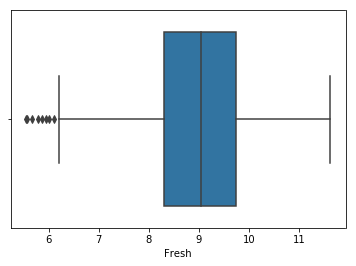

In [92]:
sns.boxplot(log_data['Fresh'])
plt.show()